In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from bson import json_util, ObjectId
from collections import Counter
import seaborn as sns
sns.set_style("whitegrid")

from scipy.stats import gaussian_kde, entropy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
O = nx.read_gpickle('/home/elisa/Projetos/modeling-news-spread/charlie_results/empirical_graph.gpickle')

## Finding $\mu$

In [8]:
def media_recit(G):
    list_c = []
    for node in G.nodes():
        dates_list = [G.node[j]['date'] for j in G.successors(node)]
        if dates_list != []:
            delta_t = max(dates_list) - G.node[node]['date']
            dif = delta_t.total_seconds()/(3600*24)
            if dif > 7:
                print(node)
            list_c.append([G.node[node]['date'].date(),dif])
        else:
            list_c.append([G.node[node]['date'].date(),0])
    return list_c

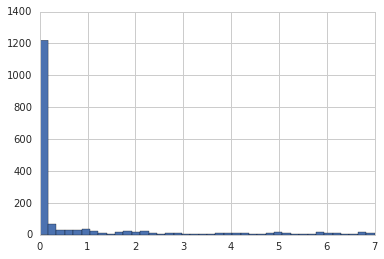

In [10]:
a = media_recit(O)
b = [i[1] for i in a]
plt.hist(b,bins=40)
plt.plot()
plt.show()

In [11]:
t = 1/mean(b)
print(t)

1.14318924219


## Finding $\lambda$

In [12]:
y  = np.loadtxt('/home/elisa/Projetos/modeling-news-spread/charlie_results/y.csv', delimiter=",")
x  = np.loadtxt('/home/elisa/Projetos/modeling-news-spread/charlie_results/x.csv', delimiter=",")

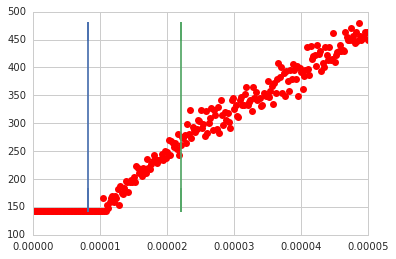

In [25]:
plt.plot(x,y,'ro')
plt.plot(len(x)*[8.12645449413e-06], y)
plt.plot(len(x)*[0.000022], y)

## Validating the model

In [3]:
time_list = [O.node[node]['date'] for node in O.nodes()] 
dic = Counter(time_list)

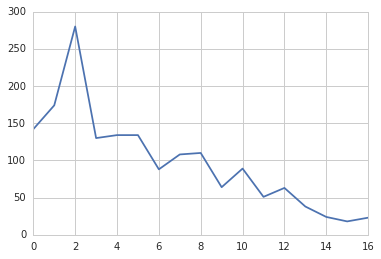

In [20]:
t0 = min(time_list)
d = []
for pos,i in enumerate(time_list):
    dif = time_list[pos].date() - t0.date()
    d.append(dif.days)
    
dic = Counter(d)
p=[]
q=[]
i=0

while len(q) < 17: 
    q.append(dic[i])
    i += 1
    
plt.plot(q)

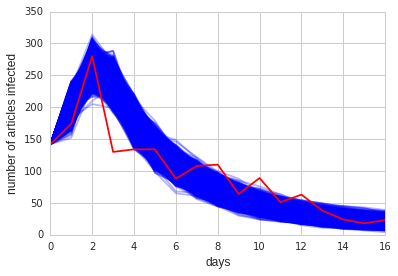

In [29]:
for i in range(0,9999):
    Infects = np.loadtxt(open('/home/elisa/Projetos/modeling-news-spread/charlie_results/Is/Infects%s.csv' %i), delimiter=",")
    a = list(Infects.sum(axis=1))
    b = [pos for pos,i in enumerate(a)]
    plt.plot(b,a,'b',alpha=0.3, label='empiric')

plt.xlabel('days',size=12)
plt.ylabel('number of articles infected',size=12)
plt.plot(b,q,'r', label='simulated')
plt.savefig('sim_compar.png', dip=300)

In [19]:
len(b)

17